In [40]:
# Initial imports
import warnings
import os 
import pandas as pd 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
%matplotlib inline

# ignore warnings
warnings.simplefilter('ignore')

# Download and update vader_lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:

# Create an Instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [42]:
# Read your api key environment variable
# Create a newsapi client
from newsapi import NewsApiClient
news_api = NewsApiClient(api_key=os.getenv('NEWS_API_KEY'))

In [43]:
# Fetch the Bitcoin news articles
bitcoin_news = news_api.get_everything(
    q='Bitcoin', 
    language='en', 
    sort_by='relevancy'
    #from_param='2020-01-01'
)

In [44]:
#(bitcoin_news['articles'])

In [45]:
# Fetch the Ethereum news articles
ethereum_news = news_api.get_everything(
    q = 'Ethereum', 
    language='en', 
    sort_by='relevancy'
)

In [46]:
ethereum_news['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin is also having a very, very bad day',
 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…',
 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750',
 'publishedAt': '2020-03-12T12:34:45Z',
 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}

#### Bitcoin sentiment scores DataFrame

In [47]:
bitcoin_sentiment = { 
    'Compound':[],
    'Negative':[],
    'Neutral':[],
    'Positive':[],
    'text':[]
}
# list of dates to use in our index
dates= []
# iterate through each article in Bitcoin news
for article in bitcoin_news['articles']: 
    # VADER sentiment score
    sentiment_score = analyzer.polarity_scores(article['title'])
    
    # append each score to the dictionary of lists created above
    bitcoin_sentiment['Compound'].append(sentiment_score['compound'])
    bitcoin_sentiment['Negative'].append(sentiment_score['neg'])
    bitcoin_sentiment['Neutral'].append(sentiment_score['neu'])
    bitcoin_sentiment['Positive'].append(sentiment_score['pos'])
    bitcoin_sentiment['text'].append(article['title'])
    
    date = article['publishedAt'][:10]
    dates.append(date)
    
# bitcoin sentiment scores(polarity scores) DataFrame   
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df.index = pd.to_datetime(dates)
bitcoin_df

,Compound,Negative,Neutral,Positive,text
2020-03-12,-0.6214,0.368,0.632,0.000,"Bitcoin is also having a very, very bad day"
2020-03-04,0.0000,0.000,1.000,0.000,HTC's Exodus 5G router can be a Bitcoin node
2020-03-04,-0.5574,0.419,0.581,0.000,India lifts ban on cryptocurrency trading
2020-03-23,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘Chinese government launches...
2020-03-19,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘Square gets green light to ...
2020-03-16,0.0000,0.000,1.000,0.000,Former Coinbase exec is now down with OCC (the...
2020-03-05,0.2500,0.000,0.833,0.167,South Korea passes one of the world’s first co...
2020-03-10,-0.2732,0.174,0.826,0.000,Satoshi Nakaboto: ‘Bitcoin hits 3-month low as...
2020-03-04,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘Germany deems Bitcoin a fin...
2020-03-12,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘The Simpsons calls Bitcoin ...


#### Ehtereum Sentiment scores DataFrame

In [48]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = { 
    'Compound':[],
    'Negative':[],
    'Neutral':[],
    'Positive':[],
    'text':[]
}
# list of dates to use in our index
dates= []
# iterate through each article in Bitcoin news
for article in ethereum_news['articles']: 
    # VADER sentiment score
    sentiment_score = analyzer.polarity_scores(article['title'])
    
    # append each score to the dictionary of lists created above
    ethereum_sentiment['Compound'].append(sentiment_score['compound'])
    ethereum_sentiment['Negative'].append(sentiment_score['neg'])
    ethereum_sentiment['Neutral'].append(sentiment_score['neu'])
    ethereum_sentiment['Positive'].append(sentiment_score['pos'])
    ethereum_sentiment['text'].append(article['title'])
    
    date = article['publishedAt'][:10]
    dates.append(date)
    
# bitcoin sentiment scores(polarity scores) DataFrame   
ethereum_df = pd.DataFrame(bitcoin_sentiment)
ethereum_df.index = pd.to_datetime(dates)
ethereum_df

,Compound,Negative,Neutral,Positive,text
2020-03-12,-0.6214,0.368,0.632,0.000,"Bitcoin is also having a very, very bad day"
2020-03-06,0.0000,0.000,1.000,0.000,HTC's Exodus 5G router can be a Bitcoin node
2020-03-24,-0.5574,0.419,0.581,0.000,India lifts ban on cryptocurrency trading
2020-03-17,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘Chinese government launches...
2020-02-27,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘Square gets green light to ...
2020-03-05,0.0000,0.000,1.000,0.000,Former Coinbase exec is now down with OCC (the...
2020-03-17,0.2500,0.000,0.833,0.167,South Korea passes one of the world’s first co...
2020-03-12,-0.2732,0.174,0.826,0.000,Satoshi Nakaboto: ‘Bitcoin hits 3-month low as...
2020-03-12,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘Germany deems Bitcoin a fin...
2020-03-24,0.0000,0.000,1.000,0.000,Satoshi Nakaboto: ‘The Simpsons calls Bitcoin ...


In [49]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.050120,0.055700,0.916650,0.027650
std,0.227825,0.126204,0.140602,0.073106
min,-0.621400,0.000000,0.581000,0.000000
25%,0.000000,0.000000,0.831250,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,0.401900,0.419000,1.000000,0.278000


In [50]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.050120,0.055700,0.916650,0.027650
std,0.227825,0.126204,0.140602,0.073106
min,-0.621400,0.000000,0.581000,0.000000
25%,0.000000,0.000000,0.831250,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,0.401900,0.419000,1.000000,0.278000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

` I got identical results for both coins`

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [51]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [52]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))
sw_addon = {'k', 'go', 'g', 'satoshi', 'nakaboto', 'let', 'user',
           'c', 'cpu'}
regex = re.compile('[^a-zA-Z ]')

In [53]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    clean_text = regex.sub('', text)
    # Create a list of the words
    tokenized_words = word_tokenize(clean_text)
    # Convert the words to lowercase
    # Remove the stop words
    words = [word.lower() for word in tokenized_words if word.lower() not in sw.union(sw_addon)]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words ]
    
    return tokens

# Create a  tokens column for bitcoin
tokens_col = []
for index, row in bitcoin_df.iterrows(): 
    tokens = tokenizer(row['text']) # calls into the tokenizer()
    tokens_col.append(tokens)

# add token_col to bitcoin_df
bitcoin_df['tokens'] = tokens_col
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
2020-03-12,-0.6214,0.368,0.632,0.0,"Bitcoin is also having a very, very bad day","[bitcoin, also, bad, day]"
2020-03-04,0.0000,0.000,1.000,0.0,HTC's Exodus 5G router can be a Bitcoin node,"[htcs, exodus, router, bitcoin, node]"
2020-03-04,-0.5574,0.419,0.581,0.0,India lifts ban on cryptocurrency trading,"[india, lift, ban, cryptocurrency, trading]"
2020-03-23,0.0000,0.000,1.000,0.0,Satoshi Nakaboto: ‘Chinese government launches...,"[chinese, government, launch, national, blockc..."
2020-03-19,0.0000,0.000,1.000,0.0,Satoshi Nakaboto: ‘Square gets green light to ...,"[square, get, green, light, become, bank]"


In [54]:
# Create a new tokens column for ethereum
tokens_col = []
for index, row in ethereum_df.iterrows(): 
    tokens = tokenizer(row['text'])
    tokens_col.append(tokens)

# add token_col to bitcoin_df
ethereum_df['tokens'] = tokens_col
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
2020-03-12,-0.6214,0.368,0.632,0.0,"Bitcoin is also having a very, very bad day","[bitcoin, also, bad, day]"
2020-03-06,0.0000,0.000,1.000,0.0,HTC's Exodus 5G router can be a Bitcoin node,"[htcs, exodus, router, bitcoin, node]"
2020-03-24,-0.5574,0.419,0.581,0.0,India lifts ban on cryptocurrency trading,"[india, lift, ban, cryptocurrency, trading]"
2020-03-17,0.0000,0.000,1.000,0.0,Satoshi Nakaboto: ‘Chinese government launches...,"[chinese, government, launch, national, blockc..."
2020-02-27,0.0000,0.000,1.000,0.0,Satoshi Nakaboto: ‘Square gets green light to ...,"[square, get, green, light, become, bank]"


In [55]:
ethereum_df.iloc[-5:,5]

2020-03-26                [bitcoin, price, halved, past, month]
2020-03-27                 [bitcoin, price, stabilizes, around]
2020-03-24              [brave, browser, add, support, bitcoin]
2020-03-20    [bitcoin, price, according, john, mcafees, pre...
2020-03-18                              [bitcoin, bounce, hour]
Name: tokens, dtype: object

In [56]:
bitcoin_df.iloc[-5:,5]

2020-03-16                [bitcoin, price, halved, past, month]
2020-03-18                 [bitcoin, price, stabilizes, around]
2020-03-25              [brave, browser, add, support, bitcoin]
2020-03-26    [bitcoin, price, according, john, mcafees, pre...
2020-03-20                              [bitcoin, bounce, hour]
Name: tokens, dtype: object

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [57]:
from nltk import ngrams
from collections import Counter

In [58]:
# create function that will return top ten bigrams
def bigram_counter(doc): 
    big_string = ' '.join(doc) # turing the list of titles into a sigle long string
    tokenized_doc = tokenizer(big_string)
    bigram = Counter(ngrams(tokenized_doc, n = 2)) # create a list of bigrams
    return bigram

In [59]:
# Generate the Bitcoin N-grams where N=2
#create a list of all article titles in Bitcoin news
bitcoin_articles = []
for article in bitcoin_news['articles']: 
    doc  = article['title']
    bitcoin_articles.append(doc)
    
#create  list of all article titles in ethereum news
ethereum_articles = []
for article in ethereum_news['articles']: 
    doc  = article['title']
    ethereum_articles.append(doc)

In [60]:
bigram_counter(bitcoin_articles)

Counter({('bitcoin', 'also'): 1,
         ('also', 'bad'): 1,
         ('bad', 'day'): 1,
         ('day', 'htcs'): 1,
         ('htcs', 'exodus'): 1,
         ('exodus', 'router'): 1,
         ('router', 'bitcoin'): 1,
         ('bitcoin', 'node'): 1,
         ('node', 'india'): 1,
         ('india', 'lift'): 1,
         ('lift', 'ban'): 1,
         ('ban', 'cryptocurrency'): 1,
         ('cryptocurrency', 'trading'): 1,
         ('trading', 'chinese'): 1,
         ('chinese', 'government'): 1,
         ('government', 'launch'): 1,
         ('launch', 'national'): 1,
         ('national', 'blockchain'): 1,
         ('blockchain', 'network'): 1,
         ('network', 'square'): 1,
         ('square', 'get'): 1,
         ('get', 'green'): 1,
         ('green', 'light'): 1,
         ('light', 'become'): 1,
         ('become', 'bank'): 1,
         ('bank', 'former'): 1,
         ('former', 'coinbase'): 1,
         ('coinbase', 'exec'): 1,
         ('exec', 'occ'): 1,
         ('occ', 'offi

In [61]:
# Generate the Ethereum N-grams where N=2
bigram_counter(ethereum_articles)

Counter({('bitcoin', 'also'): 1,
         ('also', 'bad'): 1,
         ('bad', 'day'): 1,
         ('day', 'horizon'): 1,
         ('horizon', 'raise'): 1,
         ('raise', 'another'): 1,
         ('another', 'put'): 1,
         ('put', 'virtual'): 1,
         ('virtual', 'item'): 1,
         ('item', 'blockchain'): 1,
         ('blockchain', 'launch'): 1,
         ('launch', 'first'): 1,
         ('first', 'game'): 1,
         ('game', 'brave'): 1,
         ('brave', 'partner'): 2,
         ('partner', 'binance'): 2,
         ('binance', 'trade'): 1,
         ('trade', 'crypto'): 1,
         ('crypto', 'asset'): 1,
         ('asset', 'browser'): 1,
         ('browser', 'coinbase'): 1,
         ('coinbase', 'card'): 1,
         ('card', 'work'): 1,
         ('work', 'google'): 1,
         ('google', 'pay'): 1,
         ('pay', 'law'): 1,
         ('law', 'steven'): 1,
         ('steven', 'seagals'): 1,
         ('seagals', 'shady'): 1,
         ('shady', 'crypto'): 1,
         ('cryp

In [62]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens) # turns the list of news articles into a single long string
    tokens = tokenizer(big_string) # calls into the tokenizer() from above
    return Counter(tokens).most_common(N)

In [63]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_articles)

[('bitcoin', 15),
 ('price', 4),
 ('hit', 3),
 ('cryptocurrency', 2),
 ('bank', 2),
 ('month', 2),
 ('market', 2),
 ('stabilizes', 2),
 ('around', 2),
 ('also', 1)]

In [64]:
# Get the top 10 words for Ethereum
token_count(ethereum_articles)

[('bitcoin', 7),
 ('cryptocurrency', 4),
 ('launch', 3),
 ('crypto', 3),
 ('past', 3),
 ('rout', 3),
 ('blockchain', 2),
 ('first', 2),
 ('brave', 2),
 ('partner', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

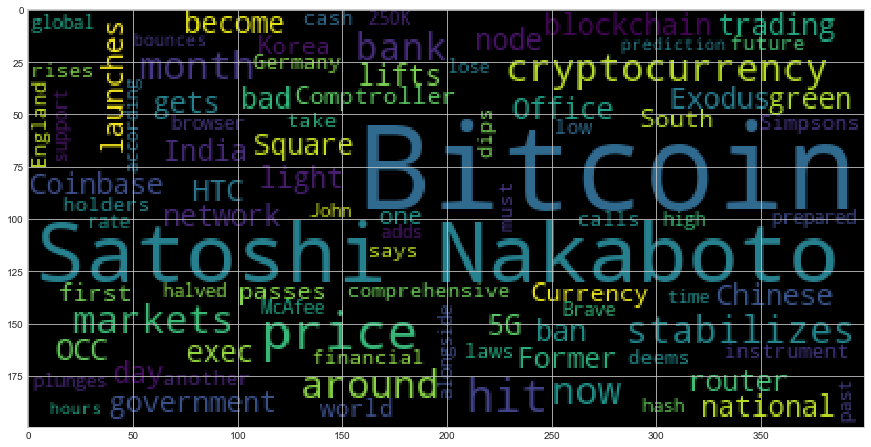

In [66]:
wc = WordCloud().generate(' '.join(bitcoin_articles))
plt.imshow(wc)

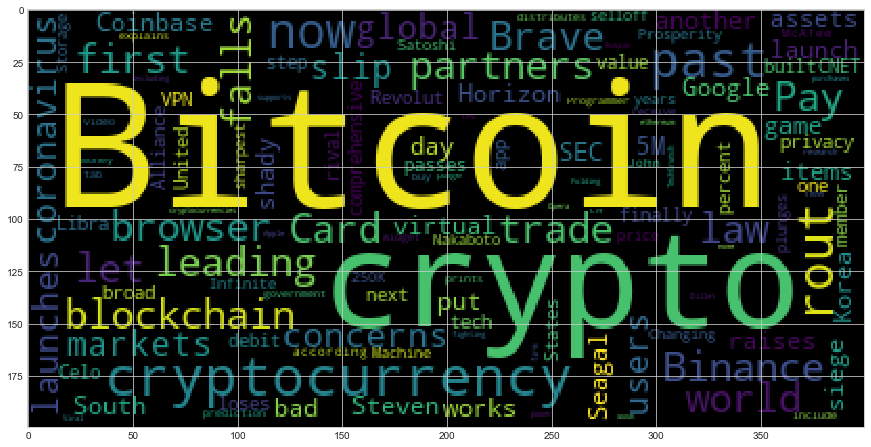

In [67]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ethereum_articles))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [68]:
import spacy
from spacy import displacy

In [69]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [70]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [71]:
# Concatenate all of the bitcoin text together
all_bitcoin_text = ' '.join(bitcoin_articles)
all_bitcoin_text

"Bitcoin is also having a very, very bad day HTC's Exodus 5G router can be a Bitcoin node India lifts ban on cryptocurrency trading Satoshi Nakaboto: ‘Chinese government launches national blockchain network’ Satoshi Nakaboto: ‘Square gets green light to become a bank’ Former Coinbase exec is now down with OCC (the Office of the Comptroller of the Currency) South Korea passes one of the world’s first comprehensive cryptocurrency laws Satoshi Nakaboto: ‘Bitcoin hits 3-month low as it dips below $8,000’ Satoshi Nakaboto: ‘Germany deems Bitcoin a financial instrument’ Satoshi Nakaboto: ‘The Simpsons calls Bitcoin the cash of the future’ Satoshi Nakaboto: ‘Bitcoin rises while markets take another hit’ Satoshi Nakaboto: ‘Bitcoin price stabilizes around $6,700’ Satoshi Nakaboto: ‘Bank of England says Bitcoin holders must be prepared to lose it all’ Satoshi Nakaboto: ‘Bitcoin plunges alongside global markets’ Satoshi Nakaboto: ‘Bitcoin hash rate hits all-time high’ Satoshi Nakaboto: ‘Bitcoin p

In [72]:
# Run the NER processor on all of the text
nlp_text = nlp(all_bitcoin_text)
# Add a title to the document

In [73]:
# Render the visualization
displacy.render(nlp_text, style = 'ent')

In [74]:
# List all Entities
for ent in nlp_text.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
Bitcoin GPE
India GPE
Satoshi Nakaboto ORG
Chinese NORP
Satoshi Nakaboto WORK_OF_ART
OCC ORG
the Office of the Comptroller of the Currency ORG
South Korea GPE
one CARDINAL
first ORDINAL
Satoshi Nakaboto ORG
Bitcoin PERSON
below $8,000 MONEY
Germany GPE
Bitcoin GPE
Satoshi Nakaboto PERSON
Simpsons PERSON
Bitcoin GPE
Satoshi Nakaboto WORK_OF_ART
Bitcoin GPE
Satoshi Nakaboto WORK_OF_ART
Bitcoin GPE
around $6,700 MONEY
Bank of England ORG
Bitcoin GPE
Bitcoin GPE
Satoshi Nakaboto WORK_OF_ART
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
past month DATE
Satoshi Nakaboto WORK_OF_ART
Bitcoin GPE
around $5,000 MONEY
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
$250K MONEY
John McAfee PERSON
Satoshi Nakaboto WORK_OF_ART
Bitcoin PERSON
18% PERCENT
24 hours TIME


---

## Ethereum NER

In [75]:
# Concatenate all of the bitcoin text together
eth_text = ' '.join(ethereum_articles)
eth_text

"Bitcoin is also having a very, very bad day Horizon raises another $5M to put virtual items on the blockchain and launch its first game Brave partners with Binance to let you trade crypto assets from your browser Coinbase Card now works with Google Pay Not above the law: Steven Seagal's shady crypto past under siege by SEC South Korea passes one of the world’s first comprehensive cryptocurrency laws This VPN built on blockchain could be the next step in privacy tech - CNET Bitcoin falls past $6,000, leading a cryptocurrency rout as global markets slip on coronavirus concerns Bitcoin falls past $6,000, leading a cryptocurrency rout as global markets slip on coronavirus concerns Revolut finally launches debit card and app in the United States Bitcoin loses 21 percent of its value in broad cryptocurrency rout Libra rival Celo launches 50-member Alliance For Prosperity *The Infinite Machine* The Changing World of Storage Cryptos: Bitcoin plunges 26%, its sharpest selloff in 7 years Satosh

In [76]:
# Run the NER processor on all of the text
eth_nlp_text = nlp(eth_text)
# Add a title to the document

In [77]:
# Render the visualization
displacy.render(eth_nlp_text, style='ent')

In [78]:
# List all Entities
for ent in eth_nlp_text.ents: 
    print(ent.text, ent.label_)

Bitcoin GPE
5 MONEY
blockchain GPE
first ORDINAL
Binance ORG
Coinbase Card PERSON
Google Pay Not ORG
Steven Seagal's PERSON
SEC ORG
South Korea GPE
one CARDINAL
first ORDINAL
VPN ORG
Bitcoin GPE
6,000 MONEY
Bitcoin GPE
6,000 MONEY
Revolut ORG
the United States GPE
Bitcoin GPE
21 percent PERCENT
Libra GPE
Celo PERSON
Alliance For Prosperity ORG
Bitcoin GPE
26% PERCENT
7 years DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
$250K MONEY
John McAfee PERSON
Programmer PERSON
Binance ORG
Folding at Home' WORK_OF_ART
400 CARDINAL
C19 ORG
Apple ORG
